# Generate figures for the p63 MPRA paper
## Firgure 4. Activity based.

In [15]:
#import libraries
import pandas as pd
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from statannotations.Annotator import Annotator
import os
#generate statannotations-compatable list of comparisons
def stats_comp_pair(x_list, hue_list):
	l=[]
	for x in x_list:
		l.append([(x,hue_list[0]),(x,hue_list[1])])
	return l
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10}, font='arial')
type_palette = {'Unique p63RE': sns.color_palette('flare')[-2], 'p53RE+p63RE':sns.color_palette('gnuplot')[-1]}
act_palette = {'Activating': sns.color_palette('RdYlBu')[-1], 'Repressing':sns.color_palette('RdYlBu')[0], 'Unchanged':sns.color_palette('RdGy')[4]}
change_p53 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$'}
change_p63 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$', 'tertiary':'$\mathregular{3^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$','senary':'$\mathregular{6^{o}}$'}
wtmut_palette = {'WT':'forestgreen', 'mut':'crimson','flankShuffle':'coral'}
order = ['Activating', 'Unchanged', 'Repressing']
#import key tables
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
fig_out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\figures'
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_WTp53KO_5variants.csv', index_col=0)
df= df[df.p63RE_class != 'septary'] #there's only 2 of them
comb = {**change_p53,**change_p63}
df['class_labels'] = df['p63RE_class'].apply(lambda x: comb[x])

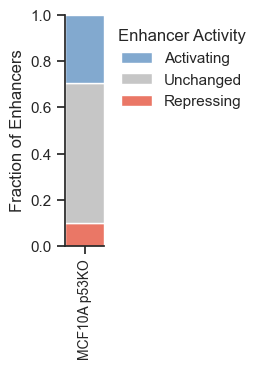

In [2]:
#2A stacked barchart
df_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
fig4A, ax = plt.subplots(figsize=(0.5,3))
sns.histplot(
    data=df_ko,
    x="cell_line", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
#fig4A.savefig(os.path.join(fig_out_path,'4A_20240430.pdf'), dpi=300, transparent=True, bbox_inches='tight')

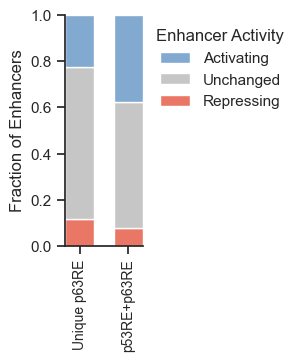

In [23]:
df_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
# df_ko.replace({'MCF10A p53KO': 'MCF10A '+ '$\it{TP53}-/-$'}, inplace=True)
df_ko['xlabel'] = df_ko.apply(lambda row: row.cell_line + '\n' + row.p63RE_type, axis='columns')
df_ko['p63RE_type'] = pd.Categorical(df_ko['p63RE_type'], ['Unique p63RE','p53RE+p63RE'])
#2A stacked barchart
fig4A, ax = plt.subplots(figsize=(1,3))
sns.histplot(
    data=df_ko,
    x="p63RE_type", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
fig4A.savefig(os.path.join(fig_out_path,'4A_20240508.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [18]:
df_ko

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,class_labels,xlabel
68480,chr1_3717092_3717116,WT,MCF10A $\it{TP53}-/-)$,0.590035,Unchanged,20,primary,+,Unique p63RE,48.333333,NaN,$\mathregular{1^{o}}$,MCF10A p53KO\nUnique p63RE
68481,chr1_31575754_31575773,WT,MCF10A $\it{TP53}-/-)$,2.069488,Unchanged,20,secondary,-,Unique p63RE,62.184874,NaN,$\mathregular{2^{o}}$,MCF10A p53KO\nUnique p63RE
68482,chr1_38117813_38117832,WT,MCF10A $\it{TP53}-/-)$,2.263045,Activating,20,primary,+,p53RE+p63RE,57.983193,11.0,$\mathregular{1^{o}}$,MCF10A p53KO\np53RE+p63RE
68483,chr1_40886808_40886827,WT,MCF10A $\it{TP53}-/-)$,1.492218,Unchanged,20,primary,+,p53RE+p63RE,54.621849,16.0,$\mathregular{1^{o}}$,MCF10A p53KO\np53RE+p63RE
68484,chr1_42941183_42941207,WT,MCF10A $\it{TP53}-/-)$,2.631261,Activating,20,primary,+,Unique p63RE,53.333333,10.0,$\mathregular{1^{o}}$,MCF10A p53KO\nUnique p63RE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82171,chr9_132993510_132993534,WT,MCF10A $\it{TP53}-/-)$,1.093877,Unchanged,8,primary,+,Unique p63RE,41.666667,NaN,$\mathregular{1^{o}}$,MCF10A p53KO\nUnique p63RE
82172,chr9_135016437_135016456,WT,MCF10A $\it{TP53}-/-)$,0.644047,Unchanged,8,primary,+,p53RE+p63RE,49.579832,6.0,$\mathregular{1^{o}}$,MCF10A p53KO\np53RE+p63RE
82173,chr9_136533879_136533893,WT,MCF10A $\it{TP53}-/-)$,0.964020,Unchanged,8,senary,-,Unique p63RE,59.166667,NaN,$\mathregular{6^{o}}$,MCF10A p53KO\nUnique p63RE
82174,chr9_137062571_137062595,WT,MCF10A $\it{TP53}-/-)$,0.864856,Repressing,8,primary,-,Unique p63RE,55.833333,NaN,$\mathregular{1^{o}}$,MCF10A p53KO\nUnique p63RE


In [4]:
#get number for the text
df_ko.value_counts(subset=['activity', 'p63RE_type'])

activity    p63RE_type  
Unchanged   Unique p63RE    4800
            p53RE+p63RE     3505
Activating  p53RE+p63RE     2408
            Unique p63RE    1636
Repressing  Unique p63RE     857
            p53RE+p63RE      488
dtype: int64

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Repressing_WT vs. Repressing_mut: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.119e-220 Stat=0.000e+00
Activating_WT vs. Activating_mut: Wilcoxon test (paired samples) with Bonferroni correction, P_val:0.000e+00 Stat=0.000e+00
Unchanged_WT vs. Unchanged_mut: Wilcoxon test (paired samples) with Bonferroni correction, P_val:7.961e-84 Stat=1.299e+07
Repressing_WT vs. Repressing_flankShuffle: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.532e-96 Stat=1.543e+05
Unchanged_WT vs. Unchanged_flankShuffle: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.705e-29 Stat=1.475e+07
Activating_WT vs. Activating_flankShuffle: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.361e-72 Stat=2.744e+06


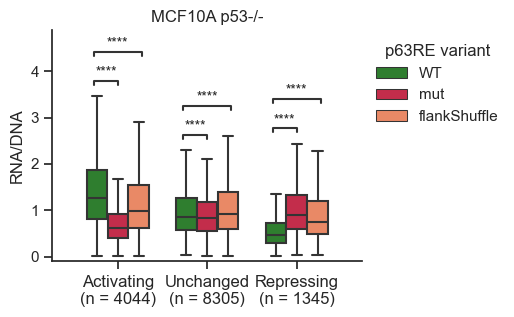

In [6]:
#figure 4B
df_ko = df[(df.cell_line == 'MCF10A p53KO') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut') | (df.enhancer_variant == 'flankShuffle'))]
fig4E, ax = plt.subplots(figsize=(4,3))
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_ko, x = 'activity', y = 'RNA/DNA', hue='enhancer_variant',order=order, width=0.7, palette = wtmut_palette, showfliers=False, ax=ax).set(ylim=(-0.1,4),xlabel=None, title='MCF10A p53-/-')
compare = [[('Activating', 'WT'),('Activating', 'mut')],[('Activating', 'WT'),('Activating', 'flankShuffle')],
		   [('Unchanged', 'WT'),('Unchanged', 'mut')],[('Unchanged', 'WT'),('Unchanged', 'flankShuffle')],
		   [('Repressing', 'WT'),('Repressing', 'mut')],[('Repressing', 'WT'),('Repressing', 'flankShuffle')]]
annotator = Annotator(ax=ax, pairs = compare, data = df_ko, x = 'activity', y = 'RNA/DNA', hue='enhancer_variant',order=order)
annotator.configure(test = "Wilcoxon", comparisons_correction = 'Bonferroni').apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#count number of enhancers and add to labels
counts = df_ko[df_ko.enhancer_variant == 'WT'].value_counts(subset='activity').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in order])
fig4E.savefig(os.path.join(fig_out_path,'4E_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

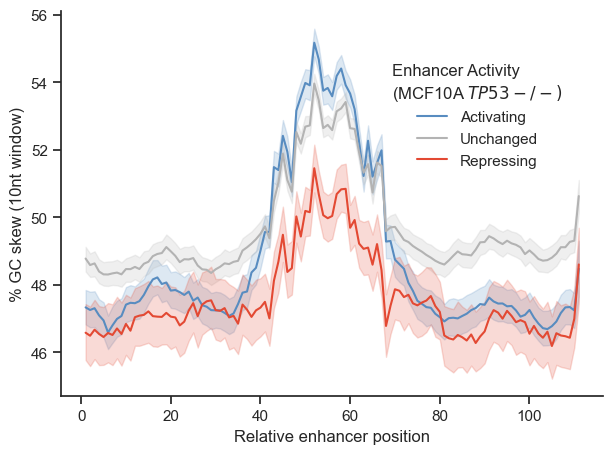

In [25]:
#draw GC skew accross enhacner
#gc = pd.read_csv('p63enh_starrseq_gcskew_matched_MCF10Ap53KO.csv', index_col=0)
fig4C, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=gc, x='position', y='GC_skew', hue='activity', hue_order=['Activating', 'Unchanged', 'Repressing'],palette=act_palette,ax=ax).set(
	ylabel = '% GC skew (10nt window)', xlabel = 'Relative enhancer position')
sns.move_legend(ax, "upper right",bbox_to_anchor=(0.95,0.9), frameon=False, title = 'Enhancer Activity\n(MCF10A ' + '$\it{TP53}-/-)$')
fig4C.savefig(os.path.join(fig_out_path,'4C_20240508.pdf'), dpi=300, transparent=True, bbox_inches='tight')

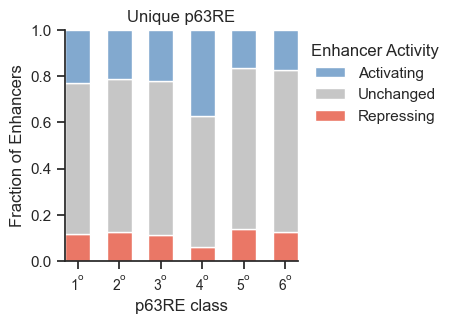

In [17]:
df['class_labels'] = df['p63RE_class'].apply(lambda x: comb[x])
#separate into 4 groups and label them
df_ko_p63 = df[(df.p63RE_type != 'p53RE+p63RE') & (df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df_ko_p63['class_labels'] = pd.Categorical(df_ko_p63['class_labels'],change_p63.values())
fig4C, ax = plt.subplots(figsize=(3,3))
sns.histplot(
    data=df_ko_p63,
    x="class_labels", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel='p63RE class', title = 'Unique p63RE')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
#count number of enhancers and add to labels
# counts = df_ko_p63.value_counts(subset='class_labels').to_dict()
# ax.set_xticklabels([x + '\n(n=' + str(counts[x]) + ')' for x in change_p63.values()], size=8)
fig4C.savefig(os.path.join(fig_out_path,'4C_20240506.svg'), dpi=300, transparent=True, bbox_inches='tight')

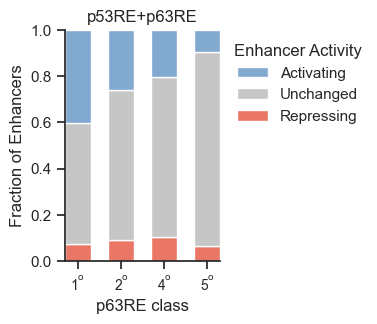

In [21]:
#separate into 4 groups and label them
df_ko_both = df[(df.p63RE_type == 'p53RE+p63RE') & (df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df_ko_both['class_labels'] = pd.Categorical(df_ko_both['class_labels'],change_p53.values())
fig4E, ax = plt.subplots(figsize=(2,3))
sns.histplot(
    data=df_ko_both,
    x="class_labels", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of Enhancers',xlabel='p63RE class', title = 'p53RE+p63RE')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'Enhancer Activity')
fig4E.savefig(os.path.join(fig_out_path,'4E_20240430.pdf'), dpi=300, transparent=True, bbox_inches='tight')

# TF motif enrichment in activating or repressing enhanser using Homer
- Create 3 lists of p63RE coordinates based on enhancer activity (1.5FC threshold) in MCF10A p53KO
- Use homer with the foliwing parameters:
	+ *findMotifsGenome.pl*
	+ List of 'activatin' or 'Repressing' p63RE coordinates
	+ *-size* 60 (looks up sequence 60nt in each direction from coordinate center; MPRA enhancer fragments are 119-120nt)
	+ *-bg* list of 'Unchanged' p63RE coordinates
- Use the output knownmotifs.txt table to plot motif enrichment

In [ ]:
#import libraries
import pandas as pd
import os
order = ['Activating', 'Unchanged', 'Repressing']
#import key tables
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\homer'
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_WTp53KO_5variants.csv', usecols=['loc', 'cell_line', 'activity', 'enhancer_variant', 'strand'])
#only need p53KOs and one variant to remove duplicated locations
df = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df[['chrom','p63RE_start','p63RE_end']] = df.apply(lambda row: row['loc'].split('_'), result_type='expand', axis='columns')
df_act = df[df.activity == 'Activating']
df_rep = df[df.activity == 'Repressing']
df_unch = df[df.activity == 'Unchanged']
df_act.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_act_1.5FC_MCF10Ap53KO.txt'), index=False, header=False,sep='\t')
df_rep.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_rep_1.5FC_MCF10Ap53KO.txt'), index=False, header=False,sep='\t')
df_unch.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_unch_1.5FC_MCF10Ap53KO.txt'), index=False, header=False,sep='\t')
#run homer motif enrichemnt using these act/rep files and unchanged enhancers as background

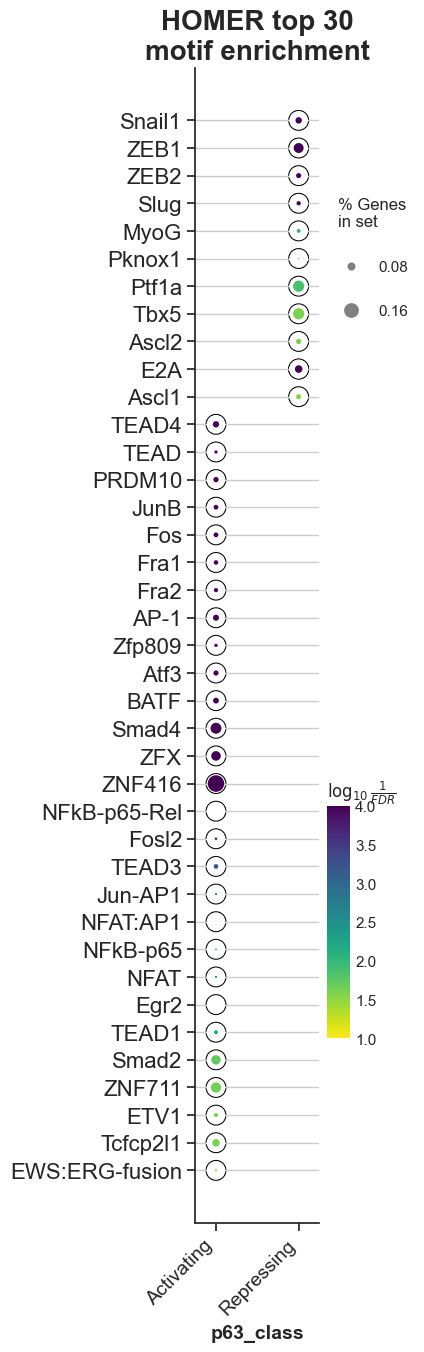

In [27]:
#dotplot prep
import numpy as np
from gseapy import dotplot
def overlap(r):
	target = round(r[long.columns[5]])
	perc = float(r['% of Target Sequences with Motif'].strip('%'))
	if perc == 0.0:
		return '0'
	total = round((target * 100) / perc)
	ovlp = str(target) + '/' + str(total)
	return ovlp
top = 30 #top motifs
#read in and format homer output
homer_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\homer'
fig_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\figures'
act = pd.read_csv(os.path.join(homer_path,'homer_motifs_act_1.5FC_MCF10Ap53KO_bg_unch_fig4','knownResults.txt'), sep='\t')
rep = pd.read_csv(os.path.join(homer_path,'homer_motifs_rep_1.5FC_MCF10Ap53KO_bg_unch_fig4','knownResults.txt'), sep='\t')
act['p63_class'], rep['p63_class'] = 'Activating','Repressing'
#rename variable columns for concatenation
for tbl in [act, rep]:
	tbl.rename(columns={tbl.columns[5]:'# of Target Sequences with Motif',
	tbl.columns[7]:'# of Background  Sequences with Motif'}, inplace=True)
#merge into one long table
long = pd.concat([act, rep],axis=0, ignore_index=True)
#simplify motif name by exrtacting short name
long['tf'] = long['Motif Name'].apply(lambda x: x[:x.find('(')])
#calculate % overlap
long['Overlap'] = long.apply(lambda row: overlap(row),axis='columns')
long.rename(columns={'q-value (Benjamini)':"Adjusted P-value"},inplace=True)
#use this if need to remove p53/63/73 since they're always enriched
filtered = long[~long.tf.isin(['p53','p63','p73'])]
ax = dotplot(filtered,
              column="Adjusted P-value",
              x='p63_class', # set x axis, so you could do a multi-sample/library comparsion
			  y='tf',
              size=10,
              top_term=top,
              figsize=(2,15),
              title = "HOMER top " + str(top) + '\nmotif enrichment',
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o')#, ofname = os.path.join(fig_path,'4F_20240501_v0.eps'))